source: PKPD modeling and simulation by Peter L. Bonate Ch4

In [1]:
import jax.numpy as jnp 
from jax import grad, jit, vmap, jacfwd, hessian, random
from jax.tree_util import tree_map, tree_flatten
from jax.experimental.ode import odeint 

import matplotlib.pyplot as plt

In [2]:
# def one_cpt_oral(dose, t, params):
#     cl, v, ka = params[0], params[1], params[2]
#     return dose/v * (ka / (ka - cl) * v) * (jnp.exp(-cl/v * t)- jnp.exp(-ka * t))

def one_cpt_oral(A, t, params):
    a0, a1 = A[0], A[1]
    cl, v, ka = params[0], params[1], params[2]
    dd_dt = -ka * a0
    dc_dt =  ka * a0 - cl * a1 / v
    
    return jnp.array([dd_dt, dc_dt])

A = [1. * 10**3, 0] # ug
params = jnp.array([1.5, 10., 0.7])

t = jnp.linspace(0, 24, 500)
conc = odeint(one_cpt_oral, A, t, params)


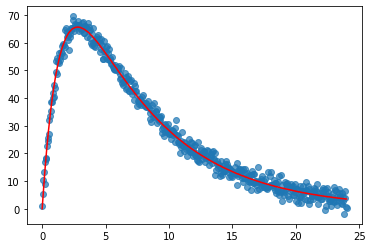

In [3]:
# constant standard deviation 2 ng/ml
constant_resid = random.normal(key=random.PRNGKey(123), shape=t.shape) * 2
plt.scatter(t, conc[1]/10+constant_resid, alpha=0.7)
plt.plot(t, conc[1]/10, color="red")

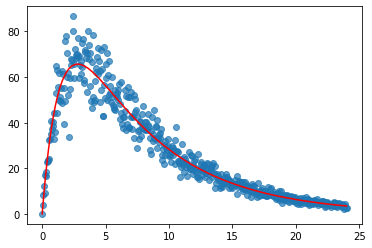

In [4]:
# proportional error (CV 15%)
prop_resid = random.normal(key=random.PRNGKey(123), shape=t.shape) * 0.15
plt.scatter(t, conc[1]/10 * (1+prop_resid), alpha=0.7)
plt.plot(t, conc[1]/10, color="red")

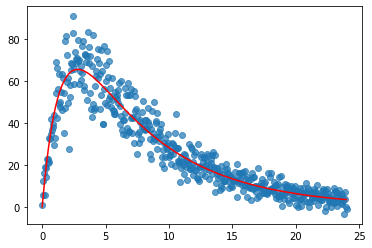

In [5]:
# constant and proportional error (CV 15%)
constant_resid = random.normal(key=random.PRNGKey(123), shape=t.shape) * 2
prop_resid = random.normal(key=random.PRNGKey(123), shape=t.shape) * 0.15
plt.scatter(t, conc[1]/10 * (1+prop_resid) + constant_resid, alpha=0.7)
plt.plot(t, conc[1]/10, color="red")